# import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# import sheets

In [2]:
file_path = 'Regional Sales Dataset.xlsx'

sheets = pd.read_excel(file_path, sheet_name=None)

df_sales = sheets['Sales Orders']
df_customers = sheets['Customers']
df_products = sheets['Products']
df_regions = sheets['Regions']
df_states = sheets['State Regions']
df_budgets = sheets['2017 Budgets']


In [3]:
print(f"df_sales shape: {df_sales.shape}")
print(f"df_customers shape: {df_customers.shape}")
print(f"df_products shape: {df_products.shape}")
print(f"df_regions shape: {df_regions.shape}")
print(f"df_states shape: {df_states.shape}")
print(f"df_budgets shape: {df_budgets.shape}")


df_sales shape: (64104, 12)
df_customers shape: (175, 2)
df_products shape: (30, 2)
df_regions shape: (994, 15)
df_states shape: (49, 3)
df_budgets shape: (30, 2)


# remove duplicates & see data

In [4]:
print("df_sales head")
df_sales.drop_duplicates(inplace=True)
display(df_sales.head())

print("\n df_customers head")
df_customers.drop_duplicates(inplace=True)
display(df_customers.head())

print("\n df_products head")
df_products.drop_duplicates(inplace=True)
display(df_products.head())

print("\n df_regions head")
df_regions.drop_duplicates(inplace=True)
display(df_regions.head())

print("\n df_states head")
df_states.drop_duplicates(inplace=True)
display(df_states.head())

print("\n df_budgets head")
df_budgets.drop_duplicates(inplace=True)
display(df_budgets.head())


df_sales head


,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270



 df_customers head


,Customer Index,Customer Names
0,1,Geiss Company
1,2,Jaxbean Group
2,3,Ascend Ltd
3,4,Eire Corp
4,5,Blogtags Ltd



 df_products head


,Index,Product Name
0,1,Product 1
1,2,Product 2
2,3,Product 3
3,4,Product 4
4,5,Product 5



 df_regions head


,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,1,Auburn,Lee County,AL,Alabama,City,32.60986,-85.48078,334,62059,21767,38342,152375113,2646161,America/Chicago
1,2,Birmingham,Shelby County/Jefferson County,AL,Alabama,City,33.52744,-86.79905,205,212461,89972,31061,378353942,6591013,America/Chicago
2,3,Decatur,Limestone County/Morgan County,AL,Alabama,City,34.57332,-86.99214,256,55437,22294,41496,141006257,17594716,America/Chicago
3,4,Dothan,Dale County/Houston County/Henry County,AL,Alabama,City,31.23370,-85.40682,334,68567,25913,42426,232166237,835468,America/Chicago
4,5,Hoover,Shelby County/Jefferson County,AL,Alabama,City,33.37695,-86.80558,205,84848,32789,77146,122016784,2553332,America/Chicago



 df_states head


,Column1,Column2,Column3
0,State Code,State,Region
1,AL,Alabama,South
2,AR,Arkansas,South
3,AZ,Arizona,West
4,CA,California,West



 df_budgets head


,Product Name,2017 Budgets
0,Product 1,3016489.209
1,Product 2,3050087.565
2,Product 3,2642352.432
3,Product 4,2885560.824
4,Product 5,3925424.542


## correct states sheet header

In [5]:
df_states.columns = df_states.iloc[0]
df_states = df_states[1:].reset_index(drop=True)


## reveiw the na values

In [6]:
print("sum of null values in sales:")
print(df_sales.isnull().sum())

print("\nsum of null values in customers:")
print(df_customers.isnull().sum())

print("\nsum of null values in products:")
print(df_products.isnull().sum())

print("\nsum of null values in regions:")
print(df_regions.isnull().sum())

print("\nsum of null values in states:")
print(df_states.isnull().sum())

print("\nsum of null values in budgets:")
print(df_budgets.isnull().sum())



sum of null values in sales:
OrderNumber                  0
OrderDate                    0
Customer Name Index          0
Channel                      0
Currency Code                0
Warehouse Code               0
Delivery Region Index        0
Product Description Index    0
Order Quantity               0
Unit Price                   0
Line Total                   0
Total Unit Cost              0
dtype: int64

sum of null values in customers:
Customer Index    0
Customer Names    0
dtype: int64

sum of null values in products:
Index           0
Product Name    0
dtype: int64

sum of null values in regions:
id               0
name             0
county           0
state_code       0
state            0
type             0
latitude         0
longitude        0
area_code        0
population       0
households       0
median_income    0
land_area        0
water_area       0
time_zone        0
dtype: int64

sum of null values in states:
0
State Code    0
State         0
Region        0
dtype:

## joins all sheet

In [7]:
df = df_sales.merge(df_customers, left_on='Customer Name Index',right_on='Customer Index', how='left')\
    .merge(df_products, left_on='Product Description Index', right_on='Index', how='left')\
    .merge(df_regions, left_on='Delivery Region Index', right_on='id', how='left')\
    .merge(df_states[["State Code","Region"]], left_on='state_code', right_on='State Code', how='left')\
    .merge(df_budgets, on='Product Name', how='left')




In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   OrderNumber                64104 non-null  object        
 1   OrderDate                  64104 non-null  datetime64[ns]
 2   Customer Name Index        64104 non-null  int64         
 3   Channel                    64104 non-null  object        
 4   Currency Code              64104 non-null  object        
 5   Warehouse Code             64104 non-null  object        
 6   Delivery Region Index      64104 non-null  int64         
 7   Product Description Index  64104 non-null  int64         
 8   Order Quantity             64104 non-null  int64         
 9   Unit Price                 64104 non-null  float64       
 10  Line Total                 64104 non-null  float64       
 11  Total Unit Cost            64104 non-null  float64       
 12  Cust

In [9]:
df.head(10)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,area_code,population,households,median_income,land_area,water_area,time_zone,State Code,Region,2017 Budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,912,145674,52798,36466,268318796,13908113,America/New York,GA,South,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Midwest,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,925,79510,26020,124759,62489257,386195,America/Los Angeles,CA,West,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,IN,Midwest,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,959,58007,24141,63158,70972793,720300,America/New York,CT,Northeast,1085037.329
5,SO - 0010394,2014-01-01,138,Export,USD,NXH382,626,23,11,5219.3,...,952,51669,22676,78589,69730100,5587760,America/Chicago,MN,Midwest,1135815.758
6,SO - 0008865,2014-01-01,53,Wholesale,USD,GUT930,540,1,7,2874.3,...,857,59195,25324,95518,17508399,184972,America/New York,MA,Northeast,3016489.209
7,SO - 0009909,2014-01-01,45,Wholesale,USD,AXW291,156,25,10,1045.2,...,909,153266,39378,49186,59446734,26188,America/Los Angeles,CA,West,5342315.484
8,SO - 0001912,2014-01-01,85,Wholesale,USD,AXW291,934,13,5,3852.5,...,385,66648,16748,94183,57533764,228038,America/Denver,UT,West,3720639.645
9,SO - 0002683,2014-01-01,125,Export,USD,AXW291,652,14,12,2914.5,...,336,52472,21562,36140,75533002,3947235,America/New York,NC,South,4028698.409


In [10]:
df.columns.values,len(df.columns)

(array(['OrderNumber', 'OrderDate', 'Customer Name Index', 'Channel',
        'Currency Code', 'Warehouse Code', 'Delivery Region Index',
        'Product Description Index', 'Order Quantity', 'Unit Price',
        'Line Total', 'Total Unit Cost', 'Customer Index',
        'Customer Names', 'Index', 'Product Name', 'id', 'name', 'county',
        'state_code', 'state', 'type', 'latitude', 'longitude',
        'area_code', 'population', 'households', 'median_income',
        'land_area', 'water_area', 'time_zone', 'State Code', 'Region',
        '2017 Budgets'], dtype=object),
 34)

## drop unnecessary cols

In [11]:
cols_to_drop = [
'Customer Name Index',
'Customer Index',
'Product Description Index',
'Index',
'id',
'State Code','state_code',
'Delivery Region Index',
'id',
'Warehouse Code',
'name',
'land_area',
'water_area'
,'time_zone'
,'area_code','type','population','households','Currency Code' ]

df.drop(columns=cols_to_drop, inplace=True)

df.columns = df.columns.str.lower()

df.columns.values,len(df.columns)


(array(['ordernumber', 'orderdate', 'channel', 'order quantity',
        'unit price', 'line total', 'total unit cost', 'customer names',
        'product name', 'county', 'state', 'latitude', 'longitude',
        'median_income', 'region', '2017 budgets'], dtype=object),
 16)

## rename columns

In [12]:
df=df.rename(columns={
    'ordernumber':'order_number',
    'orderdate':'order_date',
    'order quantity':'order_quantity',
    'unit price':'unit_price',
    'line total':'revenue',
    'total unit cost':'cost',
    'product name':'product_name',
    'customer names':'customer_name',

})

df.head()

,order_number,order_date,channel,order_quantity,unit_price,revenue,cost,customer_name,product_name,county,state,latitude,longitude,median_income,region,2017 budgets
0,SO - 000225,2014-01-01,Wholesale,6,2499.1,14994.6,1824.343,Rhynoodle Ltd,Product 27,Chatham County,Georgia,32.08354,-81.09983,36466,South,964940.231
1,SO - 0003378,2014-01-01,Distributor,11,2351.7,25868.7,1269.918,Thoughtmix Ltd,Product 20,Johnson County,Indiana,39.61366,-86.10665,54176,Midwest,2067108.120
2,SO - 0005126,2014-01-01,Wholesale,6,978.2,5869.2,684.740,Amerisourc Corp,Product 26,Alameda County,California,37.66243,-121.87468,124759,West,5685138.270
3,SO - 0005614,2014-01-01,Export,7,2338.3,16368.1,1028.852,Colgate-Pa Group,Product 7,Monroe County,Indiana,39.16533,-86.52639,30019,Midwest,889737.555
4,SO - 0005781,2014-01-01,Wholesale,8,2291.4,18331.2,1260.270,Deseret Group,Product 8,Hartford County,Connecticut,41.77524,-72.52443,63158,Northeast,1085037.329


## hundle 2017 budget col

you should see that the column belong to 2017 year only not all

In [13]:
df.loc[df['order_date'].dt.year != 2017,'2017 budgets'] = pd.NA
df.head(10)

,order_number,order_date,channel,order_quantity,unit_price,revenue,cost,customer_name,product_name,county,state,latitude,longitude,median_income,region,2017 budgets
0,SO - 000225,2014-01-01,Wholesale,6,2499.1,14994.6,1824.343,Rhynoodle Ltd,Product 27,Chatham County,Georgia,32.08354,-81.09983,36466,South,NaN
1,SO - 0003378,2014-01-01,Distributor,11,2351.7,25868.7,1269.918,Thoughtmix Ltd,Product 20,Johnson County,Indiana,39.61366,-86.10665,54176,Midwest,NaN
2,SO - 0005126,2014-01-01,Wholesale,6,978.2,5869.2,684.740,Amerisourc Corp,Product 26,Alameda County,California,37.66243,-121.87468,124759,West,NaN
3,SO - 0005614,2014-01-01,Export,7,2338.3,16368.1,1028.852,Colgate-Pa Group,Product 7,Monroe County,Indiana,39.16533,-86.52639,30019,Midwest,NaN
4,SO - 0005781,2014-01-01,Wholesale,8,2291.4,18331.2,1260.270,Deseret Group,Product 8,Hartford County,Connecticut,41.77524,-72.52443,63158,Northeast,NaN
5,SO - 0010394,2014-01-01,Export,11,5219.3,57412.3,4332.019,Zoovu Corp,Product 23,Hennepin County,Minnesota,44.91330,-93.50329,78589,Midwest,NaN
6,SO - 0008865,2014-01-01,Wholesale,7,2874.3,20120.1,1667.094,Kare Corp,Product 1,Norfolk County,Massachusetts,42.32385,-71.14200,95518,Northeast,NaN
7,SO - 0009909,2014-01-01,Wholesale,10,1045.2,10452.0,679.380,State Ltd,Product 25,Los Angeles County,California,34.05529,-117.75228,49186,West,NaN
8,SO - 0001912,2014-01-01,Wholesale,5,3852.5,19262.5,2966.425,Lazzy Group,Product 13,Salt Lake County,Utah,40.56217,-111.92966,94183,West,NaN
9,SO - 0002683,2014-01-01,Export,12,2914.5,34974.0,1311.525,Zooveo Company,Product 14,Alamance County/Guilford County,North Carolina,36.07613,-79.46830,36140,South,NaN


In [14]:
df['total_cost'] = df['order_quantity'] * df['cost']

df['profit'] = df['revenue'] - df['total_cost']

df["margin %"] = (df['profit'] / df['revenue']) * 100

df['order_date'] = pd.to_datetime(df['order_date'])

df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month_name()
df['quarter'] = df['order_date'].dt.quarter
df['month_num'] = df['order_date'].dt.month


df.head(10)

,order_number,order_date,channel,order_quantity,unit_price,revenue,cost,customer_name,product_name,county,...,median_income,region,2017 budgets,total_cost,profit,margin %,year,month,quarter,month_num
0,SO - 000225,2014-01-01,Wholesale,6,2499.1,14994.6,1824.343,Rhynoodle Ltd,Product 27,Chatham County,...,36466,South,NaN,10946.058,4048.542,27.0,2014,January,1,1
1,SO - 0003378,2014-01-01,Distributor,11,2351.7,25868.7,1269.918,Thoughtmix Ltd,Product 20,Johnson County,...,54176,Midwest,NaN,13969.098,11899.602,46.0,2014,January,1,1
2,SO - 0005126,2014-01-01,Wholesale,6,978.2,5869.2,684.740,Amerisourc Corp,Product 26,Alameda County,...,124759,West,NaN,4108.440,1760.760,30.0,2014,January,1,1
3,SO - 0005614,2014-01-01,Export,7,2338.3,16368.1,1028.852,Colgate-Pa Group,Product 7,Monroe County,...,30019,Midwest,NaN,7201.964,9166.136,56.0,2014,January,1,1
4,SO - 0005781,2014-01-01,Wholesale,8,2291.4,18331.2,1260.270,Deseret Group,Product 8,Hartford County,...,63158,Northeast,NaN,10082.160,8249.040,45.0,2014,January,1,1
5,SO - 0010394,2014-01-01,Export,11,5219.3,57412.3,4332.019,Zoovu Corp,Product 23,Hennepin County,...,78589,Midwest,NaN,47652.209,9760.091,17.0,2014,January,1,1
6,SO - 0008865,2014-01-01,Wholesale,7,2874.3,20120.1,1667.094,Kare Corp,Product 1,Norfolk County,...,95518,Northeast,NaN,11669.658,8450.442,42.0,2014,January,1,1
7,SO - 0009909,2014-01-01,Wholesale,10,1045.2,10452.0,679.380,State Ltd,Product 25,Los Angeles County,...,49186,West,NaN,6793.800,3658.200,35.0,2014,January,1,1
8,SO - 0001912,2014-01-01,Wholesale,5,3852.5,19262.5,2966.425,Lazzy Group,Product 13,Salt Lake County,...,94183,West,NaN,14832.125,4430.375,23.0,2014,January,1,1
9,SO - 0002683,2014-01-01,Export,12,2914.5,34974.0,1311.525,Zooveo Company,Product 14,Alamance County/Guilford County,...,36140,South,NaN,15738.300,19235.700,55.0,2014,January,1,1


# EDA

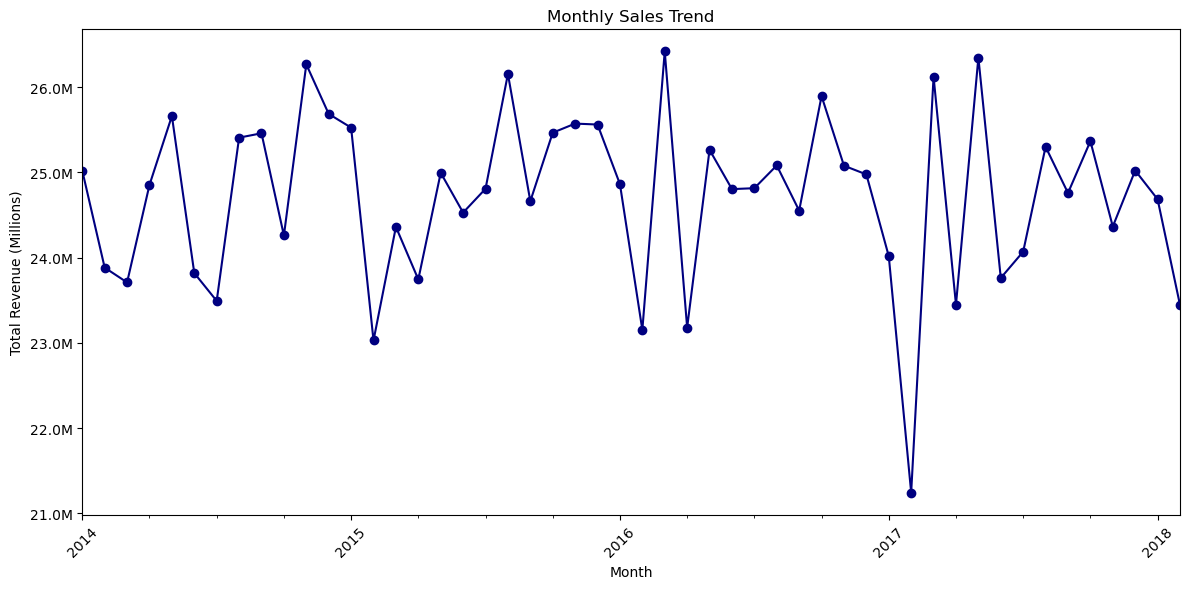

In [15]:
df['order_month'] =df['order_date'].dt.to_period('M')

monthly_sales = df.groupby('order_month')['revenue'].sum()

plt.figure(figsize=(12,6))
# Plot the monthly sales trend with circle markers and navy line
monthly_sales.plot(marker='o', color='navy')

# Scale y-axis values to millions for readability
from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

# Add title and axis labels
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue (Millions)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent clipping
plt.tight_layout()
plt.show()

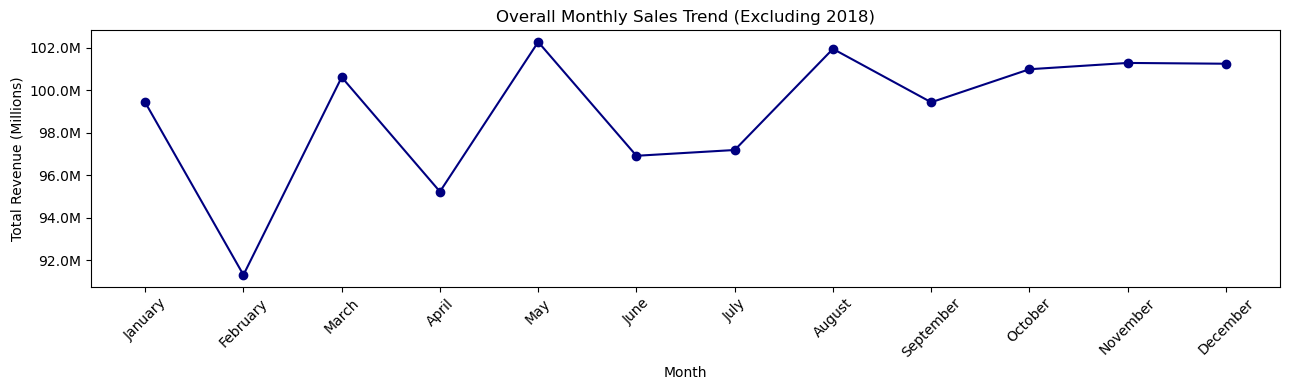

In [16]:
#1. Filter out any 2018 orders
df_ = df[df['order_date'].dt.year != 2018]   # exclude any partial-year data (i.e., January and February of 2018) so that the monthly totals aren’t skewed by an incomplete year.
                                            #I create df_ so I don’t alter the original df, preserving it intact for other analyses while filtering just for this chart.


# 2. Group by month number and month name, sum revenue, then sort by month number
monthly_sales = (
    df_
    .groupby(['month_num', 'month'])['revenue']
    .sum()
    .sort_index()
)

# 3. Plot setup
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(13, 4))
plt.plot(
    monthly_sales.index.get_level_values(1),  # X-axis: month names
    monthly_sales.values,                     # Y-axis: total revenue
    marker='o',                                # circle markers
    color='navy'                               # line color
)

# 4. Scale y-axis values to millions for readability
formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

# 5. Add title and axis labels
plt.title('Overall Monthly Sales Trend (Excluding 2018)')
plt.xlabel('Month')
plt.ylabel('Total Revenue (Millions)')

# 6. Rotate x-axis labels for readability
plt.xticks(rotation=45)

# 7. Adjust layout to prevent clipping
plt.tight_layout()

# 8. Display the plot
plt.show()


C:\Users\abdoa\AppData\Local\Temp\ipykernel_18400\1186821662.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


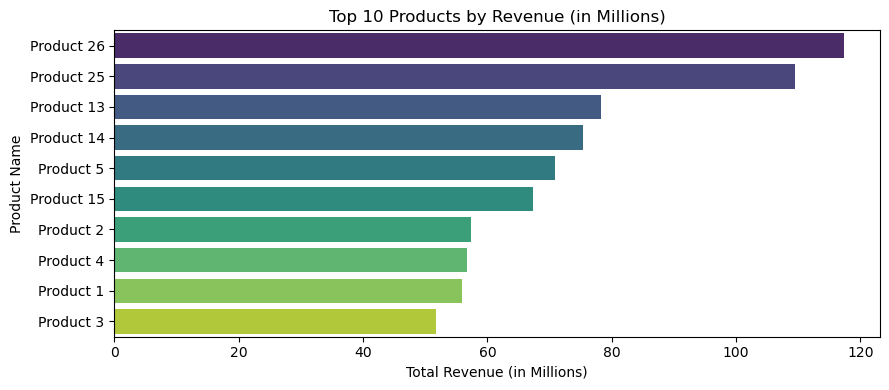

In [17]:
# Calculate total revenue for each product and convert values to millions
top_prod = df.groupby('product_name')['revenue'].sum() / 1_000_000

# Select the top 10 products by revenue
top_prod = top_prod.nlargest(10)

# Set the figure size for clarity
plt.figure(figsize=(9, 4))

# Plot a horizontal bar chart: x-axis as revenue in millions, y-axis as product names
sns.barplot(
    x=top_prod.values,    # X-axis: revenue values in millions
    y=top_prod.index,     # Y-axis: product names
    palette='viridis'     # Color palette for bars
)

# Add title and axis labels
plt.title('Top 10 Products by Revenue (in Millions)')  # Main title
plt.xlabel('Total Revenue (in Millions)')              # X-axis label
plt.ylabel('Product Name')                             # Y-axis label

# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Display the plot
plt.show()

C:\Users\abdoa\AppData\Local\Temp\ipykernel_18400\1714083238.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


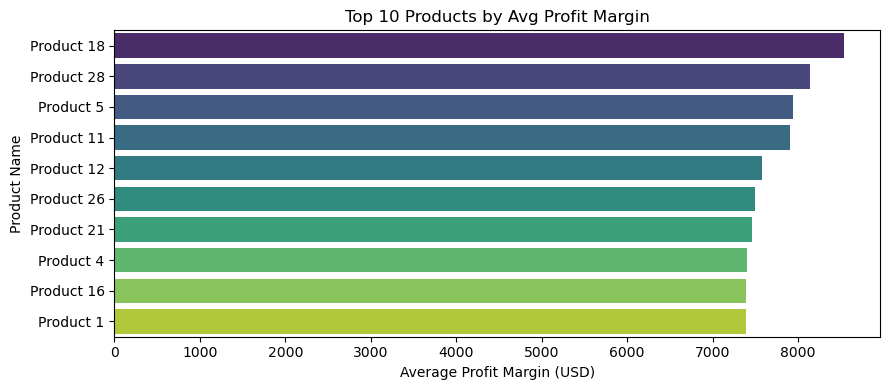

In [18]:
# 1️⃣ Compute average profit per product and take the top 10
top_margin = (
    df.groupby('product_name')['profit']
      .mean()                        # Calculate mean profit for each product
      .sort_values(ascending=False)  # Sort from highest to lowest average profit
      .head(10)                      # Keep only the top 10 products
)

# 2️⃣ Set the figure size for clarity
plt.figure(figsize=(9, 4))

# 3️⃣ Plot a horizontal bar chart
sns.barplot(
    x=top_margin.values,    # X-axis: average profit values
    y=top_margin.index,     # Y-axis: product names
    palette='viridis'       # Color palette for the bars
)

# 4️⃣ Add title and axis labels
plt.title('Top 10 Products by Avg Profit Margin')  # Chart title
plt.xlabel('Average Profit Margin (USD)')          # X-axis label
plt.ylabel('Product Name')                         # Y-axis label

# 5️⃣ Adjust layout to prevent clipping and show the plot
plt.tight_layout()
plt.show()

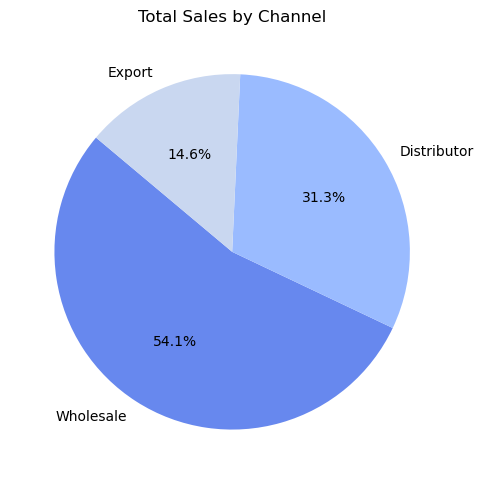

In [19]:
# Group revenue by sales channel and sort descending
chan_sales = df.groupby('channel')['revenue'].sum().sort_values(ascending=False)

# Set figure size for the pie chart
plt.figure(figsize=(5, 5))

# Plot pie chart with percentage labels and a defined start angle
plt.pie(
    chan_sales.values,                   # Data: revenue values per channel
    labels=chan_sales.index,             # Labels: channel names
    autopct='%1.1f%%',                   # Display percentages with one decimal
    startangle=140,                      # Rotate chart so first slice starts at 140 degrees
    colors=sns.color_palette('coolwarm') # Color palette for slices
)

# Add title for context
plt.title('Total Sales by Channel')

# Adjust layout to ensure everything fits well
plt.tight_layout()

# Display the chart
plt.show()

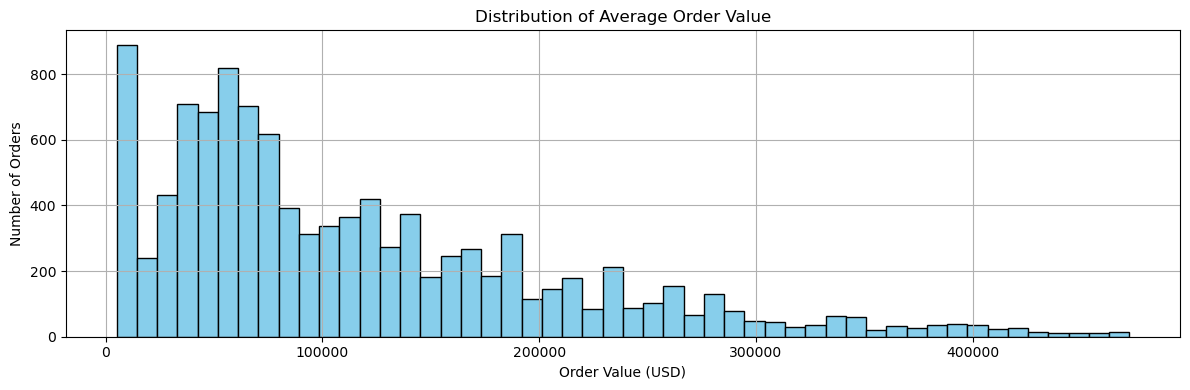

In [20]:
# Calculate the total revenue for each order to get the order value
aov = df.groupby('order_number')['revenue'].sum()

# Set the figure size for better visibility
plt.figure(figsize=(12, 4))

# Plot a histogram of order values
plt.hist(
    aov,               # Data: list of order values
    bins=50,           # Number of bins to group order values
    color='skyblue',   # Fill color of the bars
    edgecolor='black'  # Outline color of the bars
)

# Add title and axis labels for context
plt.title('Distribution of Average Order Value')
plt.xlabel('Order Value (USD)')
plt.ylabel('Number of Orders')

# Adjust layout to prevent clipping
plt.tight_layout()
plt.grid()
# Show the plot
plt.show()

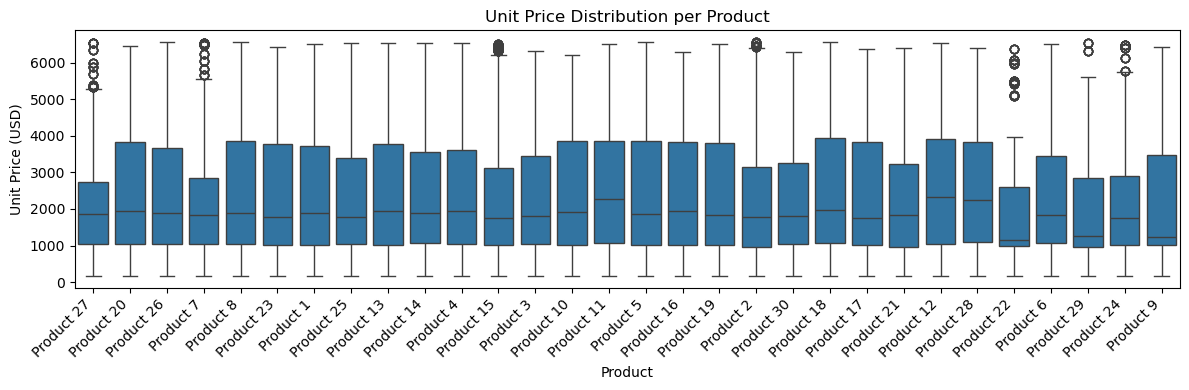

In [21]:
# Set figure size for clarity
plt.figure(figsize=(12,4))

# Create a boxplot of unit_price by product_name
sns.boxplot(
    data=df,
    x='product_name',   # X-axis: product categories
    y='unit_price',      # Y-axis: unit price values
)

# Add title and axis labels
plt.title('Unit Price Distribution per Product')  # Chart title
plt.xlabel('Product')                              # X-axis label
plt.ylabel('Unit Price (USD)')                     # Y-axis label

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Display the plot
plt.show()

C:\Users\abdoa\AppData\Local\Temp\ipykernel_18400\732538454.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


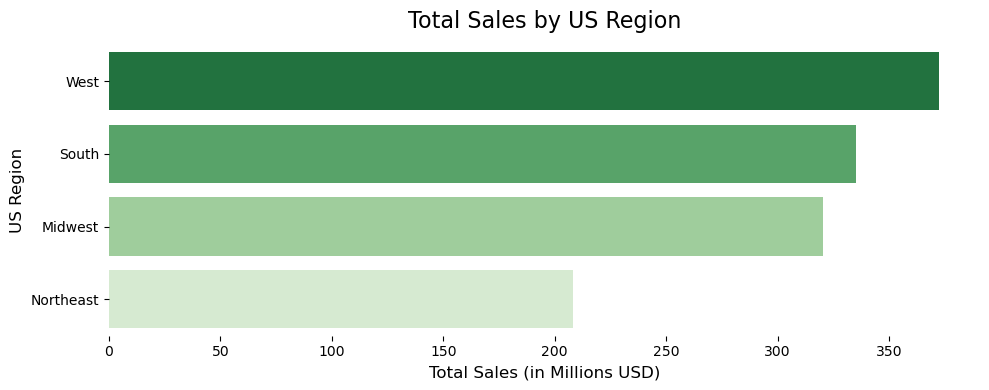

In [22]:
# 1. Aggregate total sales by region (in millions)
region_sales = (
    df
    .groupby('region')['revenue']
    .sum()
    .sort_values(ascending=False)  # so bars go top→bottom
    / 1e6                         # convert to millions
)

# 2. Plot
plt.figure(figsize=(10, 4))
sns.barplot(
    x=region_sales.values,
    y=region_sales.index,
    palette='Greens_r'          # dark→light green
)

# 3. Formatting
plt.title('Total Sales by US Region', fontsize=16, pad=12)
plt.xlabel('Total Sales (in Millions USD)', fontsize=12)
plt.ylabel('US Region', fontsize=12)
plt.xticks(rotation=0)
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()


C:\Users\abdoa\AppData\Local\Temp\ipykernel_18400\1452768722.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\abdoa\AppData\Local\Temp\ipykernel_18400\1452768722.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


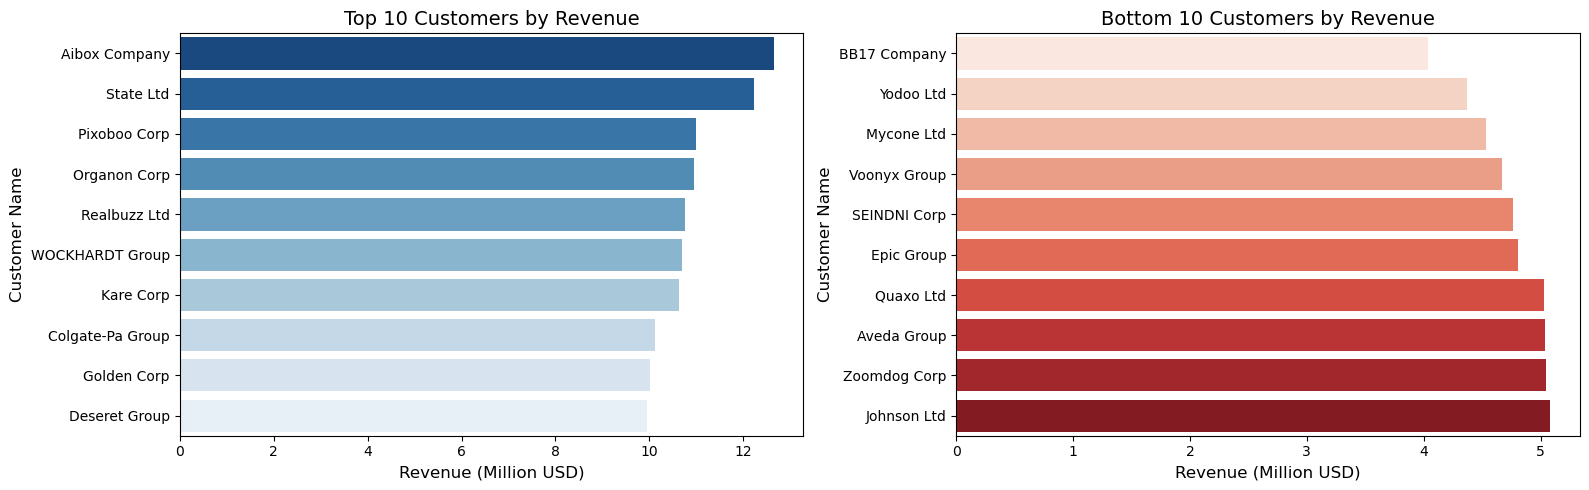

In [23]:
# 🔝 Calculate total revenue per customer and select top 10
top_rev = (
    df.groupby('customer_name')['revenue']
      .sum()                        # Sum revenue for each customer
      .sort_values(ascending=False) # Sort from highest to lowest
      .head(10)                     # Keep top 10 customers
)

# 🔻 Calculate total revenue per customer and select bottom 10
bottom_rev = (
    df.groupby('customer_name')['revenue']
      .sum()                        # Sum revenue for each customer
      .sort_values(ascending=True)  # Sort from lowest to highest
      .head(10)                     # Keep bottom 10 customers
)

# Create a figure with two side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Plot 1: Top 10 customers by revenue (converted to millions)
sns.barplot(
    x=top_rev.values / 1e6,    # X-axis: revenue in millions
    y=top_rev.index,           # Y-axis: customer names
    palette='Blues_r',         # Color palette (reversed blues)
    ax=axes[0]                 # Draw on the left subplot
)
axes[0].set_title('Top 10 Customers by Revenue', fontsize=14)         # Title
axes[0].set_xlabel('Revenue (Million USD)', fontsize=12)              # X-axis label
axes[0].set_ylabel('Customer Name', fontsize=12)                      # Y-axis label

# Plot 2: Bottom 10 customers by revenue (converted to millions)
sns.barplot(
    x=bottom_rev.values / 1e6, # X-axis: revenue in millions
    y=bottom_rev.index,        # Y-axis: customer names
    palette='Reds',            # Color palette (reds)
    ax=axes[1]                 # Draw on the right subplot
)
axes[1].set_title('Bottom 10 Customers by Revenue', fontsize=14)      # Title
axes[1].set_xlabel('Revenue (Million USD)', fontsize=12)              # X-axis label
axes[1].set_ylabel('Customer Name', fontsize=12)                      # Y-axis label

# Adjust layout to prevent overlap and display both charts
plt.tight_layout()
plt.show()

C:\Users\abdoa\AppData\Local\Temp\ipykernel_18400\3145171097.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


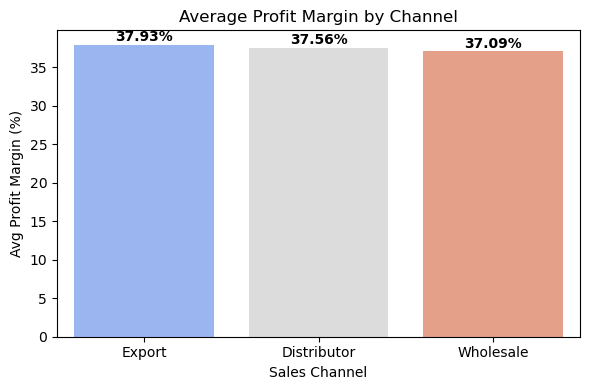

In [24]:
# 1️⃣ Compute average profit margin percentage for each channel
channel_margin = (
    df.groupby('channel')['margin %']  # Group by sales channel
      .mean()                                  # Calculate mean profit margin %
      .sort_values(ascending=False)            # Sort channels from highest to lowest margin
)

# 2️⃣ Set the figure size for clarity
plt.figure(figsize=(6, 4))

# 3️⃣ Plot a bar chart of average profit margin by channel
ax = sns.barplot(
    x=channel_margin.index,    # X-axis: channel names
    y=channel_margin.values,   # Y-axis: average profit margin values
    palette='coolwarm'         # Color palette for bars
)

# 4️⃣ Add chart title and axis labels
plt.title('Average Profit Margin by Channel')  # Main title
plt.xlabel('Sales Channel')                    # X-axis label
plt.ylabel('Avg Profit Margin (%)')             # Y-axis label

# 5️⃣ Annotate each bar with its exact margin percentage
for i, v in enumerate(channel_margin.values):
    ax.text(
        i,                  # X position (bar index)
        v + 0.5,            # Y position (bar height + small offset)
        f"{v:.2f}%",        # Text label showing percentage with two decimals
        ha='center',        # Center-align the text horizontally
        fontweight='bold'   # Bold font for readability
    )

# 6️⃣ Adjust layout to prevent clipping and display the plot
plt.tight_layout()
plt.show()

C:\Users\abdoa\AppData\Local\Temp\ipykernel_18400\3533457222.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


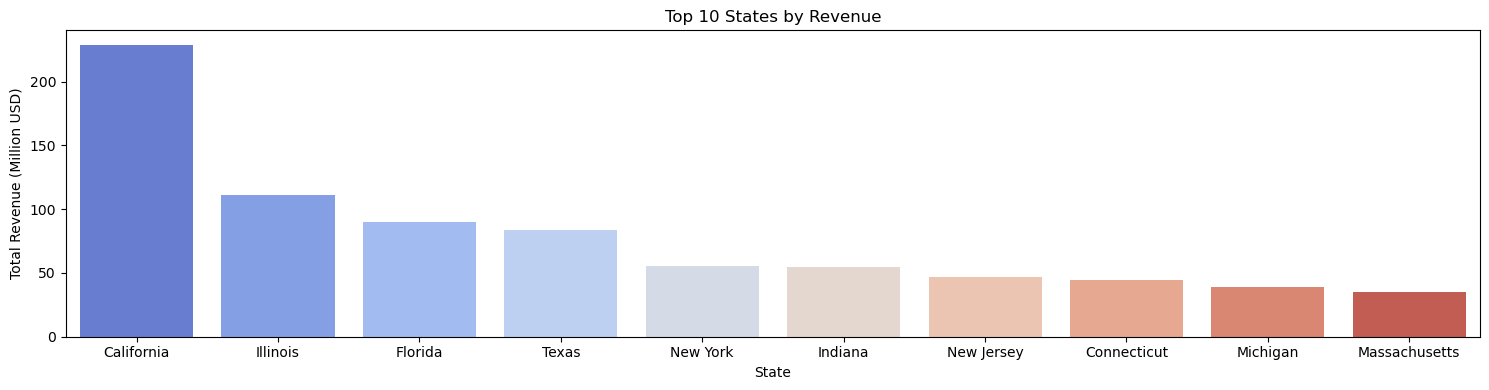

C:\Users\abdoa\AppData\Local\Temp\ipykernel_18400\3533457222.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


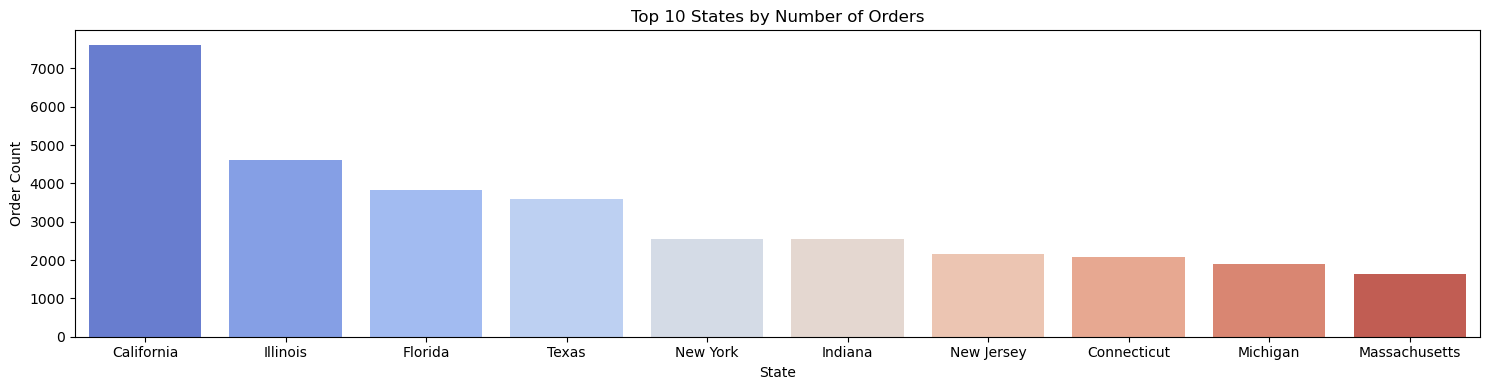

In [25]:
# Aggregate total revenue and unique order count per state
state_rev = df.groupby('state').agg(
    revenue=('revenue', 'sum'),          # Sum up revenue per state
    orders=('order_number', 'nunique')   # Count unique orders per state
).sort_values('revenue', ascending=False).head(10)  # Keep top 10 by revenue

# Plot 1: Top 10 states by revenue (scaled to millions)
plt.figure(figsize=(15, 4))
sns.barplot(
    x=state_rev.index,                   # X-axis: state names
    y=state_rev['revenue'] / 1e6,        # Y-axis: revenue in millions
    palette='coolwarm'                   # Color palette
)
plt.title('Top 10 States by Revenue')     # Chart title
plt.xlabel('State')                       # X-axis label
plt.ylabel('Total Revenue (Million USD)') # Y-axis label
plt.tight_layout()                        # Adjust layout
plt.show()                                # Display the plot

# Plot 2: Top 10 states by number of orders
plt.figure(figsize=(15, 4))
sns.barplot(
    x=state_rev.index,                   # X-axis: state names
    y=state_rev['orders'],               # Y-axis: order counts
    palette='coolwarm'                   # Color palette
)
plt.title('Top 10 States by Number of Orders')  # Chart title
plt.xlabel('State')                              # X-axis label
plt.ylabel('Order Count')                        # Y-axis label
plt.tight_layout()                               # Adjust layout
plt.show()                                       # Display the plot

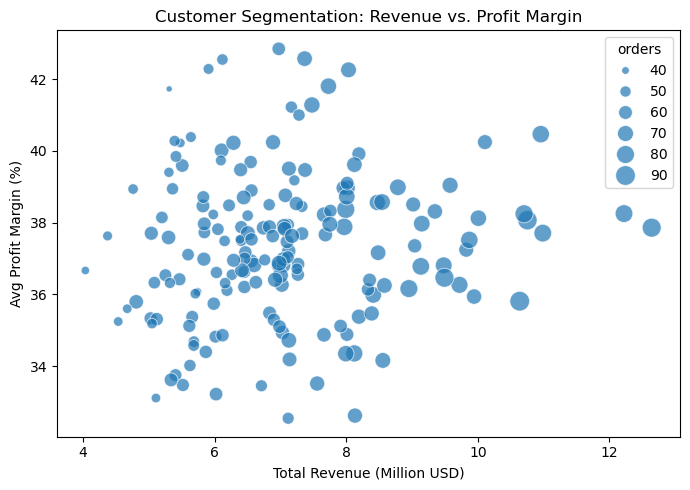

In [26]:
# Aggregate metrics per customer
cust_summary = df.groupby('customer_name').agg(
    total_revenue=('revenue', 'sum'),
    total_profit=('profit', 'sum'),
    avg_margin=('margin %', 'mean'),
    orders=('order_number', 'nunique')
)

# Convert revenue to millions
cust_summary['total_revenue_m'] = cust_summary['total_revenue'] / 1e6

plt.figure(figsize=(7, 5))

# Bubble chart with revenue in millions
sns.scatterplot(
    data=cust_summary,
    x='total_revenue_m',        # <-- use revenue in millions
    y='avg_margin',
    size='orders',
    sizes=(20, 200),
    alpha=0.7
)

plt.title('Customer Segmentation: Revenue vs. Profit Margin')
plt.xlabel('Total Revenue (Million USD)')  # <-- updated label
plt.ylabel('Avg Profit Margin (%)')

plt.tight_layout()
plt.show()


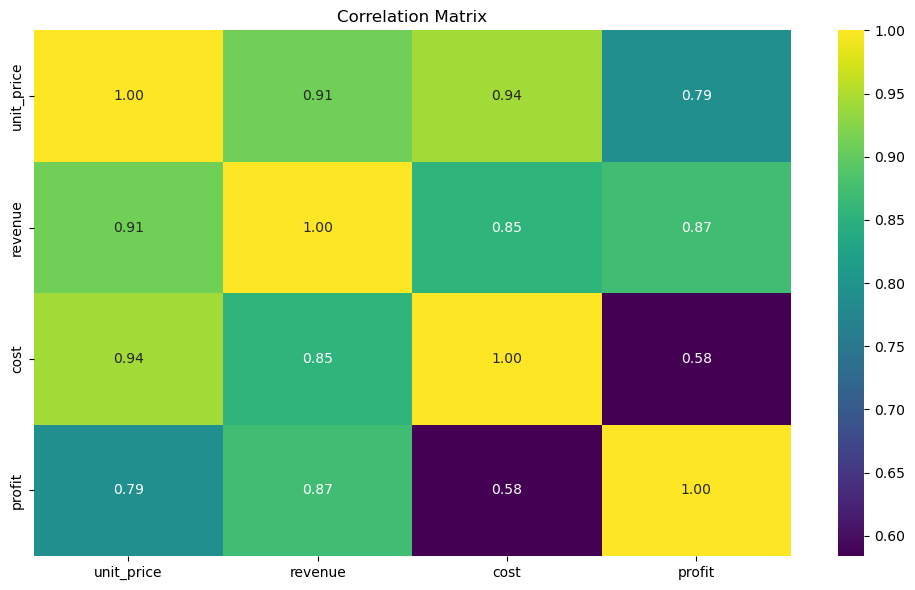

In [27]:
# List numeric columns to include in the correlation calculation
num_cols = ['unit_price', 'revenue', 'cost', 'profit']

# Calculate the correlation matrix for these numeric features
corr = df[num_cols].corr()

# Set the figure size for clarity
plt.figure(figsize=(10,6))

# Plot the heatmap with annotations and a viridis colormap
sns.heatmap(
    corr,           # Data: correlation matrix
    annot=True,     # Display the correlation coefficients on the heatmap
    fmt=".2f",      # Format numbers to two decimal places
    cmap='viridis'  # Color palette for the heatmap
)

# Add title for context
plt.title('Correlation Matrix')

# Adjust layout to prevent clipping
plt.tight_layout()

# Display the heatmap
plt.show()

# save claned data

In [29]:
df.to_excel('Cleaned_Regional_Sales_Data.xlsx', index=False)